In [ ]:
import os
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten,Convolution2D,MaxPooling2D,Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/new dataset/train',
    target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/new dataset/validation',
    target_size=(64, 64),
        batch_size=32,
        class_mode='binary')



Found 200 images belonging to 2 classes.
Found 200 images belonging to 3 classes.


In [ ]:
classifier = Sequential()
classifier.add(Convolution2D(32,(3,3), input_shape=(64,64,3), activation='relu'))

classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())

classifier.add(Dense(128))
classifier.add(Activation('relu'))

classifier.add(Dense(1))
classifier.add(Activation('sigmoid'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
classifier.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 30752)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │       3,936,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,937,409 (15.02 MB)

 Trainable params: 3,937,409 (15.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=classifier.fit(
        train_generator,
        steps_per_epoch=2891,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=1330)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


   3/2891 ━━━━━━━━━━━━━━━━━━━━ 18:06 376ms/step - accuracy: 0.5295 - loss: 1.6099

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2891/2891 ━━━━━━━━━━━━━━━━━━━━ 5s 845us/step - accuracy: 0.5400 - loss: 1.2802 - val_accuracy: 0.0050 - val_loss: 3.2190
Epoch 2/50
2891/2891 ━━━━━━━━━━━━━━━━━━━━ 1s 219us/step - accuracy: 0.6098 - loss: 0.7593 - val_accuracy: 0.0100 - val_loss: 2.1831
Epoch 3/50
2891/2891 ━━━━━━━━━━━━━━━━━━━━ 3s 220us/step - accuracy: 0.6399 - loss: 0.6474 - val_accuracy: 0.2300 - val_loss: 0.2205
Epoch 4/50
2891/2891 ━━━━━━━━━━━━━━━━━━━━ 3s 249us/step - accuracy: 0.7551 - loss: 0.5811 - val_accuracy: 0.2200 - val_loss: -0.0378
Epoch 5/50
2891/2891 ━━━━━━━━━━━━━━━━━━━━ 1s 228us/step - accuracy: 0.7401 - loss: 0.5182 - val_accuracy: 0.0700 - val_loss: 0.6959
Epoch 6/50
2891/2891 ━━━━━━━━━━━━━━━━━━━━ 3s 252us/step - accuracy: 0.7850 - loss: 0.4563 - val_accuracy: 0.2250 - val_loss: -0.3608
Epoch 7/50
2891/2891 ━━━━━━━━━━━━━━━━━━━━ 2s 454us/step - accuracy: 0.8250 - loss: 0.4147 - val_accuracy: 0.0700 - val_loss: 0.6975
Epoch 8/50
2891/2891 ━━━━━━━━━━━━━━━━━━━━ 2s 229us/step - accuracy: 0.8149 - loss: 0.

In [ ]:
classifier.save('/content/drive/MyDrive/new dataset/Model/classifier.h5')

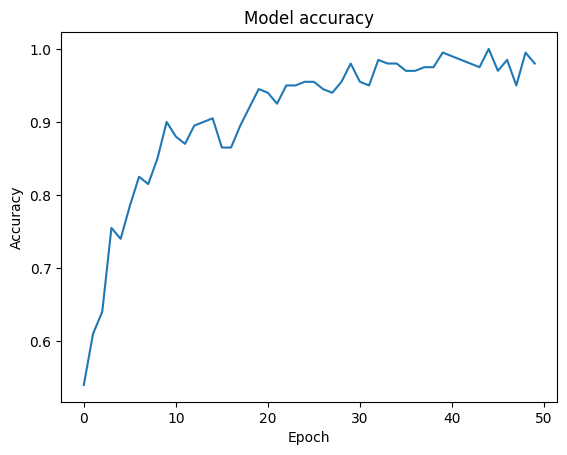

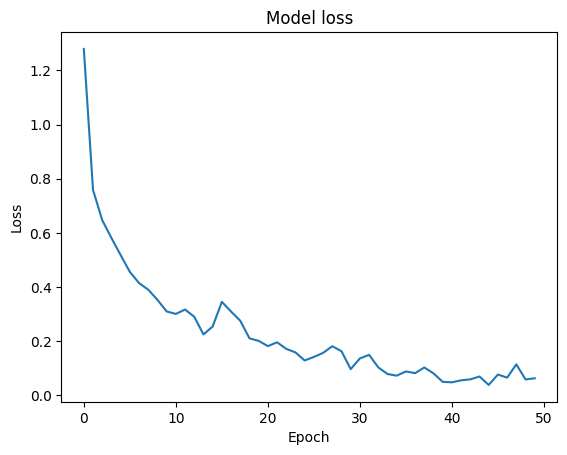

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

Flask Application

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


!ls -l "/content/drive/MyDrive/new dataset/Model/classifier.h5"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
-rw------- 1 root root 47284160 Sep 24 12:59 '/content/drive/MyDrive/new dataset/Model/classifier.h5'


In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/new dataset/Model/classifier.h5')

In [ ]:
import numpy as np
from PIL import Image
img = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/new dataset/test/male/160002.jpg', target_size=(64, 64))
x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.

prediction = model.predict(x)
if prediction[0][0] < 0.5:
  print('Female')
else:
  print('Male')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
Male


In [ ]:
from flask import send_from_directory, Flask, render_template, request, url_for
from werkzeug.utils import secure_filename
import os
import numpy as np
from PIL import Image
import tensorflow as tf

app = Flask(__name__)
UPLOAD_FOLDER = '/content/drive/MyDrive/new dataset/uploads'
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER


model_path ='/content/drive/MyDrive/new dataset/Model/classifier.h5';
classifier = tf.keras.models.load_model(model_path)

def preprocess_image(img):
    if img is None or not isinstance(img, np.ndarray):
        raise ValueError("Image data is empty or invalid.")

    img = tf.keras.preprocessing.image.load_img(img, target_size=(64, 64))
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.
    return img

def predict(img, model):
    image_array = preprocess_image(img)
    prediction = model.predict(image_array)
    if prediction[0][0] < 0.5:
      return 'Female'
    else:
     return 'Male'





@app.route('/', methods=['GET', 'POST'])
def index():
    if request.method == 'POST':
        file = request.files['file']
        if file.filename == '':
            return render_template('index.html', error='No file selected')

        filename = secure_filename(file.filename)
        filepath = os.path.join(app.config['UPLOAD_FOLDER'], filename)
        file.save(filepath)

        img = Image.open(filepath).convert("RGB")

        predicted_class = predict(img, classifier)


        image_url = url_for('uploaded_file', filename=filename)

        return render_template('result.html', predicted_class=predicted_class, image_url=image_url)

    return render_template('index.html')

@app.route('/uploads/<filename>')
def uploaded_file(filename):
    return send_from_directory(app.config['UPLOAD_FOLDER'], filename)


if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
ERROR:root:Unexpected exception finding object shape
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/google/colab/_debugpy_repr.py", line 54, in get_shape
    shape = getattr(obj, 'shape', None)
  File "/usr/local/lib/python3.10/dist-packages/werkzeug/local.py", line 318, in __get__
    obj = instance._get_current_object()
  File "/usr/local/lib/python3.10/dist-packages/werkzeug/local.py", line 519, in _get_current_object
    raise RuntimeError(unbound_message) from None
RuntimeError: Working outside of request context.

This typically means that you attempted to use functionality that needed
an active HTTP request. Consult the documentation on testing for
information about how to avoid this problem.
